In [1]:
from collections import Counter
import os
import re

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
korean_zodiac = {
                    4 : 'Mouse', 5 : 'Cow', 6 : 'Tiger', 7 : 'Rabbit', 8 : 'Dragon', 9 : 'Snake',
                    10 : 'Horse', 11 : 'Sheep' , 0 : 'Monkey', 1 : 'Chicken', 2 : 'Dog', 3 : 'Pig'
                }

zodiac_cnt    = {v : 0 for k, v in korean_zodiac.items()}

In [3]:
df_year = pd.read_csv('../data/birth_yearly.csv', encoding = 'euc-kr').T
df_prov = pd.read_csv('../data/birth_province.csv', encoding = 'euc-kr')

In [4]:
df_year.rename(columns = df_year.iloc[0], inplace = True)
df_year = df_year.loc['1972':].drop(['자연증가건수(명)', '조출생률(천명당)', '자연증가율(천명당)', '합계출산율(명)', '출생성비(명)'], axis = 1)

<AxesSubplot: >

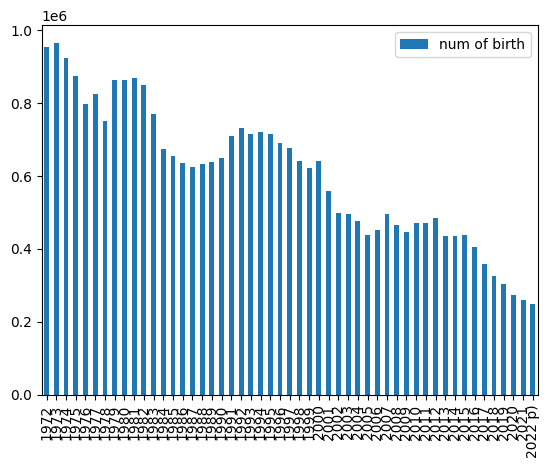

In [5]:
df_year.rename(columns = {'출생아수(명)' : 'num of birth'}, inplace = True)
df_year.plot.bar()

In [6]:
clear_num = lambda x: int(re.sub('[^0-9]', '', x))
zodiac    = [korean_zodiac[clear_num(year) % 12] for year in df_year.index]

In [7]:
df_year['zodiac'] = zodiac

for year in df_year.iterrows():
    
    pop, zod         = year[1]
    zodiac_cnt[zod] += pop

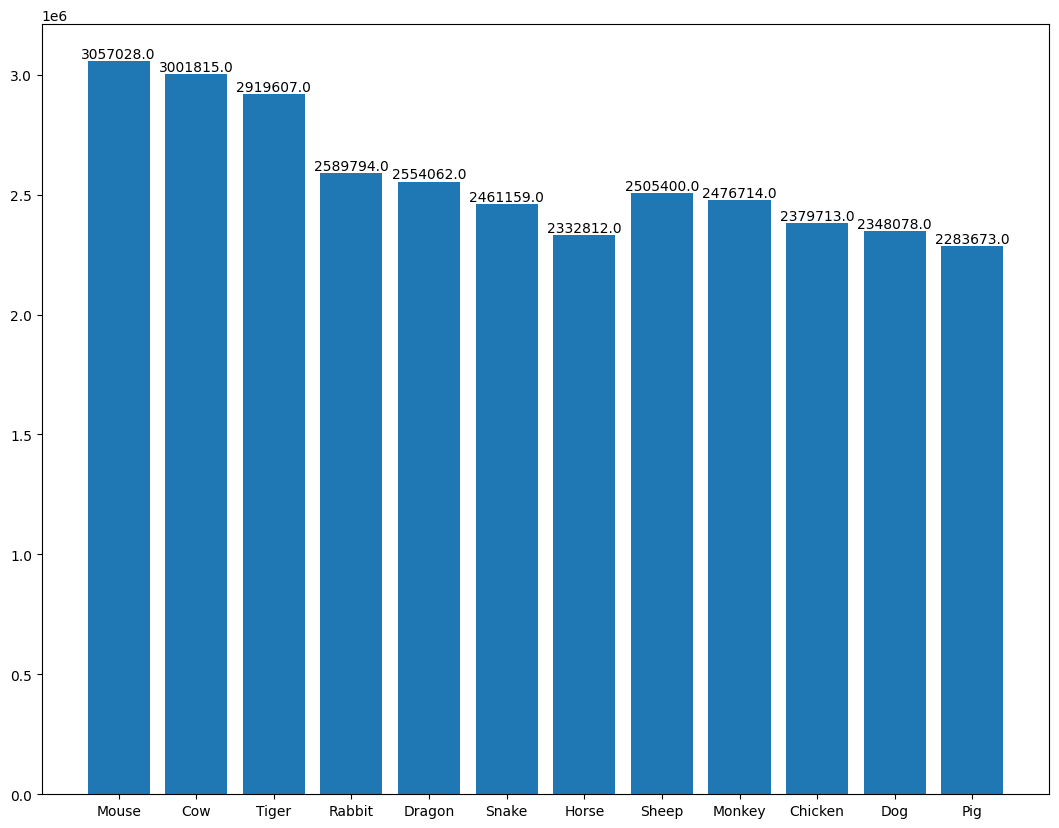

In [8]:
plt.figure(figsize = (13, 10))

plt.bar(zodiac_cnt.keys(), zodiac_cnt.values())

for k, v in zodiac_cnt.items():
    plt.text(
                k, v, v,
                verticalalignment = 'bottom',
                horizontalalignment = 'center'
            )